## Observations and Insights 
- From the bar charts we can see that Capomulin and Ramicane were applied the most from all of the Drug Regimens. 
- Capomulin and Ramicane are also the most successful drugs in reducing the tumor volume in the mice. 
- In an individual observation we can see the decrease in the tumor volume for mouse s185 (Capomulin) to take roughly 45 days. It would be interesting to sample more for a more solid conclusion.
- There is a strong correlation between the weight of the mice and the size of their tumors at 0.84. As the mice weight increases in the splatter chart, so does the weight of the mouse. 

In [581]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [582]:
# Checking the number of mice.
mice_count = mouse_merge_df["Mouse ID"].value_counts()
mice_count = len(mice_count)
#mouse_merge_df["Mouse ID"].unique()
mice_count

249

In [583]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_merge_df.loc[mouse_merge_df.duplicated(subset = ["Mouse ID", "Timepoint",]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [584]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = mouse_merge_df.loc[mouse_merge_df["Mouse ID"] == "g989"]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [585]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_merge_df = mouse_merge_df.drop(mouse_merge_df.index[908: 921])

In [586]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = mouse_merge_df["Mouse ID"].value_counts()
clean_mice_count = len(clean_mice_count)
clean_mice_count
#mouse_merge_df
#mouse_merge_df["Mouse ID"].unique()

248

## Summary Statistics

In [587]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tv_mean = mouse_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tv_median = mouse_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tv_var = mouse_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tv_std = mouse_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tv_sem = mouse_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tumor_volume_stats_df = pd.DataFrame({"Mean": tv_mean, "Median": tv_median, "Variance": tv_var, "Standard Deviation": tv_std, "SEM": tv_sem})
# This method produces everything in a single groupby function
tumor_volume_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

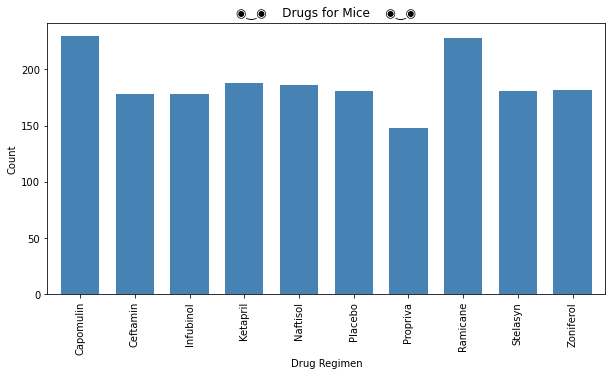

In [588]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_group = mouse_merge_df.groupby("Drug Regimen")
drug_group_count = drug_group["Drug Regimen"].count()
#drug_group_count
drug_count_bar = drug_group_count.plot(kind='bar', color = "steelblue", figsize = (10, 5), width = .7)
drug_count_bar.set_xlabel("Drug Regimen")
drug_count_bar.set_ylabel("Count")
plt.title("◉‿◉    Drugs for Mice    ◉‿◉")

plt.show()

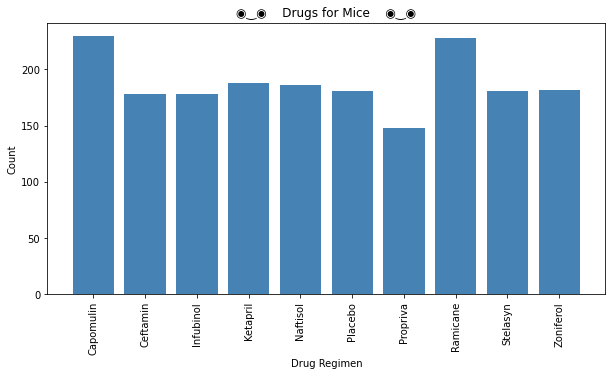

<Figure size 720x360 with 0 Axes>

In [589]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.xticks(rotation = "vertical")
drug_regimen_list = drug_group_count.index.tolist()
drug_regimen_x = np.arange(len(drug_count_list))
drug_regimen_x = drug_regimen_list
plt.bar(drug_regimen_x, drug_count_list, color = "steelblue")
plt.title("◉‿◉    Drugs for Mice    ◉‿◉")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.figure(figsize = (10, 5))

plt.show()

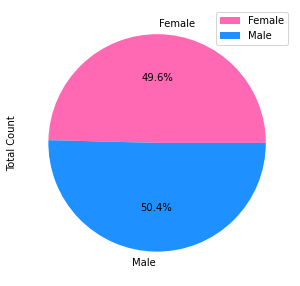

In [590]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create dataframe for male and female mice
male = mouse_merge_df.loc[mouse_merge_df["Sex"] == "Male"]
male_ID = len(male["Mouse ID"].unique())
#male_pct = "{:.2f}%".format(male_ID / clean_mice_count * 100)
female = mouse_merge_df.loc[mouse_merge_df["Sex"] == "Female"]
female_ID = len(female["Mouse ID"].unique())
#female_pct = "{:.2f}%".format(female_ID / clean_mice_count * 100)
sex_df = pd.DataFrame([{"Sex": "Male", "Total Count": male_ID},
                       {"Sex": "Female", "Total Count": female_ID}])
#sex_df

# Create pie chart using plot and the dataframe above
sex_df.groupby(["Sex"]).sum().plot(kind = "pie", y = "Total Count", autopct = "%1.1f%%", colors = ["hotpink", "dodgerblue"])

plt.show()

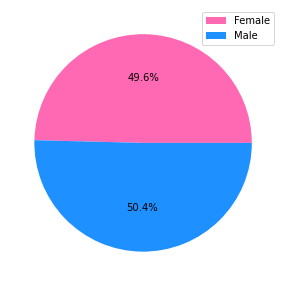

In [591]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = [49.6, 50.4]
labels = "Female", "Male"
colors = "hotpink", "dodgerblue"
plt.pie(count, colors = colors, autopct = "%1.1f%%")
plt.legend(labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [592]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Select final volume of each mouse 
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# capomulin
capomulin = mouse_merge_df.loc[mouse_merge_df["Drug Regimen"] == "Capomulin"]
capomulin_maxgroup = capomulin.groupby('Mouse ID').max()["Timepoint"]
capomulin_df = pd.DataFrame(capomulin_maxgroup)
capomulin_merge = pd.merge(capomulin_maxgroup, mouse_merge_df, on = ("Mouse ID","Timepoint"))
#capomulin_merge

# ramicane 
ramicane = mouse_merge_df.loc[mouse_merge_df["Drug Regimen"] == "Ramicane"]
ramicane_maxgroup = ramicane.groupby('Mouse ID').max()["Timepoint"]
ramicane_df = pd.DataFrame(ramicane_maxgroup)
ramicane_merge = pd.merge(ramicane_maxgroup, mouse_merge_df, on = ("Mouse ID","Timepoint"))
#ramicane_merge

# infubinol 
infubinol = mouse_merge_df.loc[mouse_merge_df["Drug Regimen"] == "Infubinol"]
infubinol_maxgroup = infubinol.groupby('Mouse ID').max()["Timepoint"]
infubinol_df = pd.DataFrame(infubinol_maxgroup)
infubinol_merge = pd.merge(infubinol_maxgroup, mouse_merge_df, on = ("Mouse ID","Timepoint"))
#infubinol_merge

# ceftamin 
ceftamin = mouse_merge_df.loc[mouse_merge_df["Drug Regimen"] == "Ceftamin"]
ceftamin_maxgroup = ceftamin.groupby('Mouse ID').max()["Timepoint"]
ceftamin_df = pd.DataFrame(ceftamin_maxgroup)
ceftamin_merge = pd.merge(ceftamin_maxgroup, mouse_merge_df, on = ("Mouse ID","Timepoint"))
ceftamin_merge




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [593]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds

# capomulin
cap_tumors = capomulin_merge["Tumor Volume (mm3)"]
cap_quartiles = cap_tumors.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq #7.781863460000004
cap_lower_bound = cap_lowerq - (1.5 * cap_iqr) #20.70456164999999
cap_upper_bound = cap_upperq + (1.5 * cap_iqr) #51.83201549
print(f"Capomulin values below {cap_lower_bound.round(decimals = 2)} could be outliers.")
print(f"Capomulin values above {cap_upper_bound.round(decimals = 2)} could be outliers.")
    
# ramicane 
ram_tumors = ramicane_merge["Tumor Volume (mm3)"]
ram_quartiles = ram_tumors.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq #9.098536719999998
ram_lower_bound = ram_lowerq - (1.5 * ram_iqr) #17.912664470000003
ram_upper_bound = ram_upperq + (1.5 * ram_iqr) #54.30681135
print(f"Ramicane values below {ram_lower_bound.round(decimals = 2)} could be outliers.")
print(f"Ramicane values above {ram_upper_bound.round(decimals = 2)} could be outliers.")

# infubinol 
inf_tumors = infubinol_merge["Tumor Volume (mm3)"]
inf_quartiles = inf_tumors.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq #11.477135160000003
inf_lower_bound = inf_lowerq - (1.5 * inf_iqr) #36.83290494999999
inf_upper_bound = inf_upperq + (1.5 * inf_iqr) #82.74144559000001
print(f"Infubinol values below {inf_lower_bound.round(decimals = 2)} could be outliers.")
print(f"Infubinol values above {inf_upper_bound.round(decimals = 2)} could be outliers.")

# ceftamin 
cef_tumors = ceftamin_merge["Tumor Volume (mm3)"]
cef_quartiles = cef_tumors.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq #15.577752179999997
cef_lower_bound = cef_lowerq - (1.5 * cef_iqr) #25.355449580000002
cef_upper_bound = cef_upperq + (1.5 * cef_iqr) #87.66645829999999
print(f"Ceftamin values below {cef_lower_bound.round(decimals = 2)} could be outliers.")
print(f"Ceftamin values above {cef_upper_bound.round(decimals = 2)} could be outliers.")


Capomulin values below 20.7 could be outliers.
Capomulin values above 51.83 could be outliers.
Ramicane values below 17.91 could be outliers.
Ramicane values above 54.31 could be outliers.
Infubinol values below 36.83 could be outliers.
Infubinol values above 82.74 could be outliers.
Ceftamin values below 25.36 could be outliers.
Ceftamin values above 87.67 could be outliers.


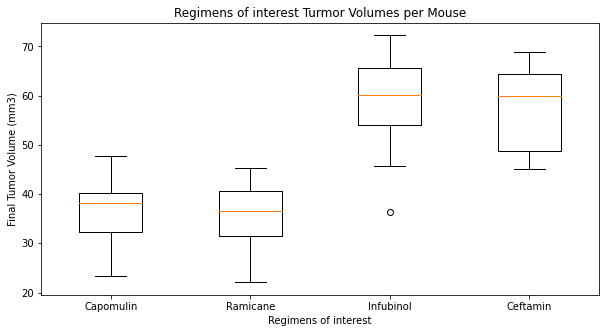

In [594]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatments = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_title("Regimens of interest Turmor Volumes per Mouse")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Regimens of interest")
ax1.boxplot(treatments, labels = drug_names)
plt.show()

## Line and Scatter Plots

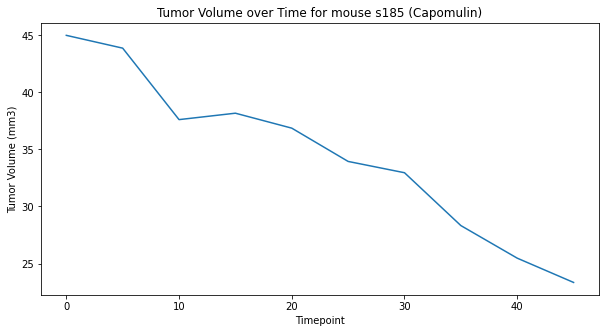

In [595]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#capomulin.head(5) #mouse = s185
s185 = capomulin.loc[capomulin["Mouse ID"] == "s185"]
#s185
s185_x = s185["Timepoint"]
s185_y = s185["Tumor Volume (mm3)"]
plt.plot(s185_x, s185_y)
plt.title("Tumor Volume over Time for mouse s185 (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

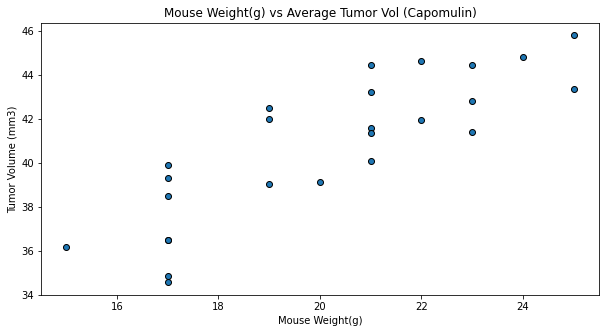

In [596]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor_avg = capomulin.groupby(["Mouse ID"]).mean()
weight_x = tumor_avg["Weight (g)"]
tumor_y = tumor_avg["Tumor Volume (mm3)"]
plt.scatter(weight_x, tumor_y, edgecolors = "black")
plt.title("Mouse Weight(g) vs Average Tumor Vol (Capomulin)")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717


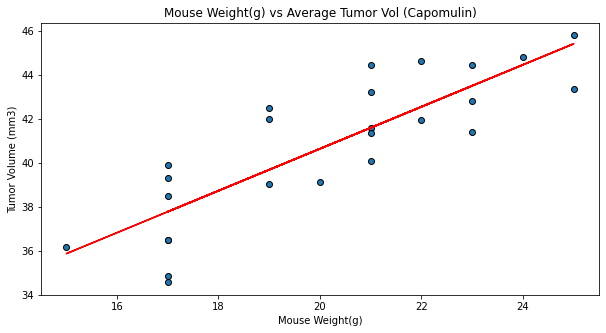

In [626]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight_x, tumor_y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_x, tumor_y)
regress_values = weight_x * slope + intercept
plt.scatter(weight_x, tumor_y, edgecolors = "black")
plt.plot(weight_x, regress_values,"r-")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight(g) vs Average Tumor Vol (Capomulin)")
print(f"The r-squared is: {rvalue**2.}")
plt.show()